In [1]:
cd ..

/home/tommy/Scrivania/Polimi/Honours Programme/SCFR


In [2]:
from games.hanabi import *
from utilities.drawing import draw_tree
from data_structures.cfr_trees import CFRTree
from cfr_code.reconstruction_cfr import SolveWithReconstructionCFR

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
tree = build_hanabi_tree(num_players = 2, num_colors = 1, color_distribution = [1, 1], num_cards_per_player = 1)

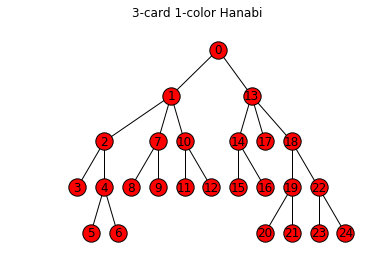

In [5]:
draw_tree(tree, title = "3-card 1-color Hanabi")

In [ ]:
tree.display()

In [ ]:
c_tree = CFRTree(tree)

In [ ]:
tree = build_hanabi_tree(num_players = 2, num_colors = 1, color_distribution = [2, 1], num_cards_per_player = 1)

In [ ]:
draw_tree(tree)

In [ ]:
tree.root.children

In [6]:
_t = build_hanabi_tree(2, 2, [2, 1], 1, display_progress = True)

--- Processing deck [(1, 2), (2, 1), (1, 1), (1, 1), (2, 2), (1, 2)] (1/180) ---
--- Processing deck [(1, 1), (1, 2), (2, 2), (1, 1), (1, 2), (2, 1)] (2/180) ---
--- Processing deck [(1, 2), (1, 2), (2, 1), (2, 2), (1, 1), (1, 1)] (3/180) ---
--- Processing deck [(1, 2), (1, 1), (2, 1), (2, 2), (1, 2), (1, 1)] (4/180) ---
--- Processing deck [(2, 1), (1, 1), (1, 1), (1, 2), (2, 2), (1, 2)] (5/180) ---
--- Processing deck [(1, 1), (2, 2), (1, 2), (2, 1), (1, 2), (1, 1)] (6/180) ---
--- Processing deck [(1, 1), (1, 2), (2, 2), (2, 1), (1, 2), (1, 1)] (7/180) ---
--- Processing deck [(2, 1), (1, 2), (1, 2), (1, 1), (1, 1), (2, 2)] (8/180) ---
--- Processing deck [(2, 2), (1, 1), (1, 2), (2, 1), (1, 1), (1, 2)] (9/180) ---
--- Processing deck [(1, 1), (1, 2), (2, 2), (1, 2), (2, 1), (1, 1)] (10/180) ---
--- Processing deck [(1, 1), (2, 1), (2, 2), (1, 2), (1, 2), (1, 1)] (11/180) ---
--- Processing deck [(2, 1), (1, 2), (1, 1), (2, 2), (1, 1), (1, 2)] (12/180) ---
--- Processing deck [(2, 

--- Processing deck [(2, 1), (1, 2), (1, 1), (1, 2), (2, 2), (1, 1)] (102/180) ---
--- Processing deck [(2, 2), (1, 1), (1, 1), (1, 2), (1, 2), (2, 1)] (103/180) ---
--- Processing deck [(1, 2), (2, 1), (1, 2), (1, 1), (1, 1), (2, 2)] (104/180) ---
--- Processing deck [(1, 1), (2, 1), (1, 2), (1, 1), (2, 2), (1, 2)] (105/180) ---
--- Processing deck [(2, 2), (1, 1), (1, 2), (1, 1), (2, 1), (1, 2)] (106/180) ---
--- Processing deck [(1, 1), (1, 2), (2, 2), (1, 2), (1, 1), (2, 1)] (107/180) ---
--- Processing deck [(1, 1), (2, 2), (1, 1), (1, 2), (2, 1), (1, 2)] (108/180) ---
--- Processing deck [(1, 1), (1, 1), (1, 2), (2, 1), (2, 2), (1, 2)] (109/180) ---
--- Processing deck [(2, 1), (1, 1), (2, 2), (1, 2), (1, 2), (1, 1)] (110/180) ---
--- Processing deck [(1, 2), (1, 1), (1, 2), (2, 2), (1, 1), (2, 1)] (111/180) ---
--- Processing deck [(1, 1), (1, 1), (2, 1), (1, 2), (1, 2), (2, 2)] (112/180) ---
--- Processing deck [(1, 1), (2, 2), (2, 1), (1, 1), (1, 2), (1, 2)] (113/180) ---
--- 

In [7]:
CFRTree(_t)

Sequences = 
{393696: 1, 1: 0, 604606: 3, 604495: 1}
{1: 0, 3: 0, 5: 0, 59: 2}


Exception: ERROR: This tree is not a game with perfect recall. Nodes of information set 64(137, 1437985, ) have different sequences.

In [96]:
def get_action_names(node, actions):
    if len(actions) == 0:
        return [ node.incoming_action_name ]
    return [ node.incoming_action_name ] + get_action_names(node.children[actions[0]], actions[1:])

In [75]:
_t.root.children[0].children[0].children[1].children[0].children[0].children[0].children[2].children[2].children[1]

Player 0 - Infoset 64 - Node 137 (children of Node131 via Action p.0-P1)

In [97]:
actions = get_action_names(_t.root.children[0], [0, 1, 0, 0, 0, 2, 2, 1])
actions

['[(1, 2), (2, 1), (1, 1), (1, 1), (2, 2), (1, 2)]',
 'c1.n2-P0',
 'd.0-P1',
 'd.0-P0',
 'c0.c1-P1',
 'd.0-P0',
 'p.0-P1',
 'c1.n1-P0',
 'p.0-P1']

In [77]:
def buildHanabiState(baseState, actions):
    if len(actions) == 0:
        return baseState
    return buildHanabiState(baseState.getChildState(actions[0]), actions[1:])

In [98]:
s = buildHanabiState(HanabiState.createBaseState([(1, 2), (2, 1), (1, 1), (1, 1), (2, 2), (1, 2)],
                                                 2, 1, 2, 1), actions[1:])
s.print()

--- Hanabi State ---
Player hands = [[(2, 2)], [(0, 0)]]
Remaining deck = []
Cards in play (highest per color) = [1, 1]
Discarded cards = [(2, 1), (1, 2), (1, 1)]
Clue tokens available = 1
Clue history = ['c1.n2-P0', 'c0.c1-P1', 'c1.n1-P0']
Player clued hands = [[(0, 0)], [(0, 0)]]
Action history = ['c1.n2', 'd.0', 'd.0', 'c0.c1', 'd.0', 'p.0', 'c1.n1', 'p.0']
Remaining turns after deck end = 1
--- Hanabi State ---


In [ ]:
1437985

In [68]:
_t.root.children[94].children[0].children[1].children[1].children[0].children[1].children[2].children[3].children[2]

Player 0 - Infoset 64 - Node 1437985 (children of Node1437970 via Action p.0-P1)

In [91]:
_t.root.children[94].children[0].children[1].children[1].children[0].children[1].children[2].children[3].children[2]

Player 0 - Infoset 64 - Node 1437985 (children of Node1437970 via Action p.0-P1)

In [99]:
actions2 = get_action_names(_t.root.children[94], [0, 1, 1, 0, 1, 2, 3, 2])
actions2

['[(1, 2), (2, 1), (1, 2), (1, 1), (2, 2), (1, 1)]',
 'c1.n2-P0',
 'd.0-P1',
 'd.0-P0',
 'c0.c1-P1',
 'd.0-P0',
 'p.0-P1',
 'c1.n1-P0',
 'p.0-P1']

In [100]:
s2 = buildHanabiState(HanabiState.createBaseState([(1, 2), (2, 1), (1, 2), (1, 1), (2, 2), (1, 1)],
                                                 2, 1, 2, 1), actions2[1:])

--- Hanabi State ---
Player hands = [[(2, 2)], [(0, 0)]]
Remaining deck = []
Cards in play (highest per color) = [1, 1]
Discarded cards = [(2, 1), (1, 2), (1, 1)]
Clue tokens available = 1
Clue history = ['c1.n2-P0', 'c0.c1-P1', 'c1.n1-P0']
Player clued hands = [[(0, 0)], [(0, 0)]]
Action history = ['c1.n2', 'd.0', 'd.0', 'c0.c1', 'd.0', 'p.0', 'c1.n1', 'p.0']
Remaining turns after deck end = 1
--- Hanabi State ---


In [102]:
s.print()
print("\n")
s2.print()

--- Hanabi State ---
Player hands = [[(2, 2)], [(0, 0)]]
Remaining deck = []
Cards in play (highest per color) = [1, 1]
Discarded cards = [(2, 1), (1, 2), (1, 1)]
Clue tokens available = 1
Clue history = ['c1.n2-P0', 'c0.c1-P1', 'c1.n1-P0']
Player clued hands = [[(0, 0)], [(0, 0)]]
Action history = ['c1.n2', 'd.0', 'd.0', 'c0.c1', 'd.0', 'p.0', 'c1.n1', 'p.0']
Remaining turns after deck end = 1
--- Hanabi State ---


--- Hanabi State ---
Player hands = [[(2, 2)], [(0, 0)]]
Remaining deck = []
Cards in play (highest per color) = [1, 1]
Discarded cards = [(2, 1), (1, 2), (1, 1)]
Clue tokens available = 1
Clue history = ['c1.n2-P0', 'c0.c1-P1', 'c1.n1-P0']
Player clued hands = [[(0, 0)], [(0, 0)]]
Action history = ['c1.n2', 'd.0', 'd.0', 'c0.c1', 'd.0', 'p.0', 'c1.n1', 'p.0']
Remaining turns after deck end = 1
--- Hanabi State ---


In [101]:
s.toPlayerState(0) == s2.toPlayerState(0)

True